In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from astropy.table import Table, join

from my_progs.catalog.read_ocars import read_ocars

%matplotlib inline

In [2]:
# OCARS catalog
ocars = read_ocars()
ocars.keep_columns(["iers_name", "class"])

# Radio-to-optical offset
r2o= Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# Cross-match
r2o_sou = join(r2o, ocars, keys="iers_name")

print("The types of {} sources are known.".format(len(r2o_sou)))

The types of 512 sources are known.


Source type

A  - AGN, including unspecified QSO in NED

AB - blazar (replaced by other AGN class when known)

AL - BL Lac type

AQ - quasar

AR - LINER-type AGN

AS - Seyfert galaxy

A1 - Seyfert 1 galaxy

A2 - Seyfert 2 galaxy

G  - radio galaxy

G2 - double or multiple galaxy

I  - IR source

R  - radio source

S  - star or stellar object

SN - supernova (remnant)

U  - UV source

V  - visual source

X  - X-ray source

GR - gamma-ray source

In [3]:
r2o_sou_g = r2o_sou.group_by("class")

print("Type    #Sou")
for key, group in zip(r2o_sou_g.groups.keys, r2o_sou_g.groups):
    print("{:2s}      {:4d}".format(key[0], len(group)))
    

Type    #Sou
A1        34
AB         4
AL       104
AQ       355
AS         1
G          2
V         12


In [4]:
# A1
r2o_a1 = r2o_sou[r2o_sou["class"] == "A1"]

# AB
r2o_ab = r2o_sou[r2o_sou["class"] == "AB"]

# Al
r2o_al = r2o_sou[r2o_sou["class"] == "AL"]

# AQ
r2o_aq = r2o_sou[r2o_sou["class"] == "AQ"]

# G
r2o_g = r2o_sou[r2o_sou["class"] == "G"]

# V
r2o_v = r2o_sou[r2o_sou["class"] == "V"]

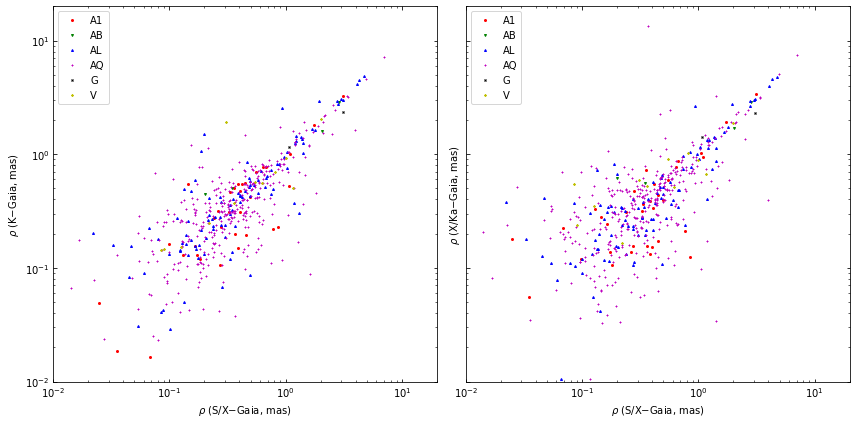

In [5]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(12, 6), 
                               ncols=2, sharex=True, sharey=True)

data = [r2o_a1, r2o_ab, r2o_al, r2o_aq, r2o_g, r2o_v]
color = ["r", "g", "b", "m", "k", "y"]
marker = ["o", "v", "^", "+", "x", "*"]
label = ["A1", "AB", "AL", "AQ", "G", "V"]

for i in range(6):
    ax0.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_k_cor"], 
            "{}{}".format(color[i], marker[i]), ms=2, label=label[i])
    ax1.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_ka_cor"], 
            "{}{}".format(color[i], marker[i]), ms=2, label=label[i])
    
ax0.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax1.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")

ax0.set_xlim([0.01, 20])
ax0.set_ylim([0.01, 20])
ax0.set_xscale("log")
ax0.set_yscale("log")

ax0.legend()
ax1.legend()

plt.subplots_adjust()
plt.tight_layout()

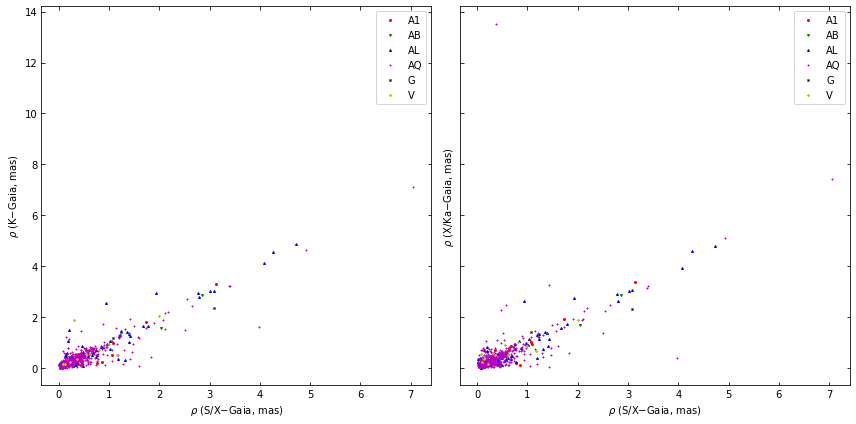

In [6]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(12, 6), 
                               ncols=2, sharex=True, sharey=True)

data = [r2o_a1, r2o_ab, r2o_al, r2o_aq, r2o_g, r2o_v]
color = ["r", "g", "b", "m", "k", "y"]
marker = ["o", "v", "^", "+", "x", "*"]
label = ["A1", "AB", "AL", "AQ", "G", "V"]

for i in range(6):
    ax0.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_k_cor"], 
            "{}{}".format(color[i], marker[i]), ms=2, label=label[i])
    ax1.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_ka_cor"], 
            "{}{}".format(color[i], marker[i]), ms=2, label=label[i])
    
ax0.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax1.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")

# ax0.set_xlim([0.01, 20])
# ax0.set_ylim([0.01, 20])
# ax0.set_xscale("log")
# ax0.set_yscale("log")

ax0.legend()
ax1.legend()

plt.subplots_adjust()
plt.tight_layout()

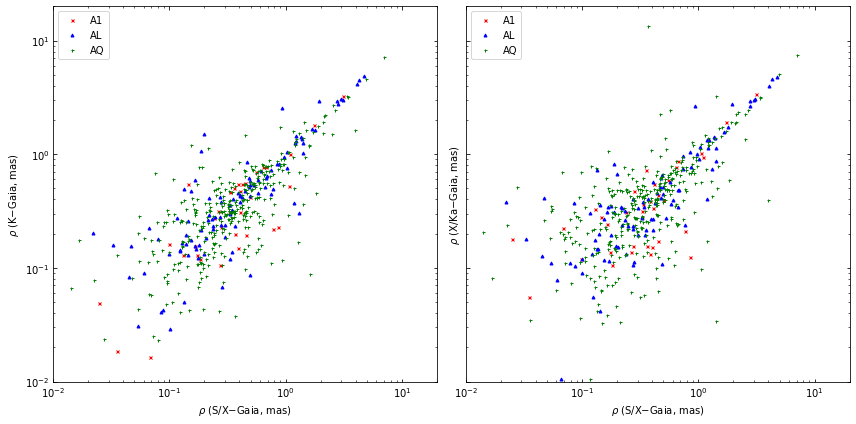

In [7]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(12, 6), 
                               ncols=2, sharex=True, sharey=True)

data = [r2o_a1, r2o_al, r2o_aq]
color = ["r", "b", "g"]
marker = ["x", "^", "+"]
label = ["A1", "AL", "AQ"]

for i in range(len(data)):
    ax0.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_k_cor"], 
            "{}{}".format(color[i], marker[i]), ms=3, label=label[i])
    ax1.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_ka_cor"], 
            "{}{}".format(color[i], marker[i]), ms=3, label=label[i])
    
ax0.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax1.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")

ax0.set_xlim([0.01, 20])
ax0.set_ylim([0.01, 20])
ax0.set_xscale("log")
ax0.set_yscale("log")

ax0.legend()
ax1.legend()

plt.subplots_adjust()
plt.tight_layout()

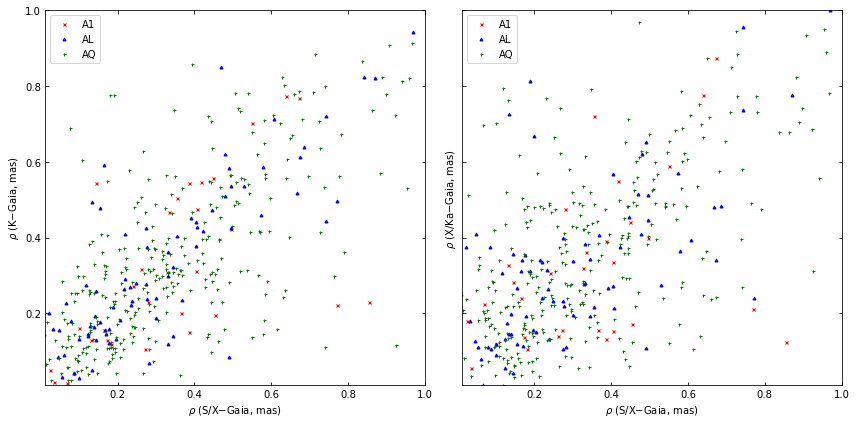

In [8]:
# Distribution of angular separation
fig, (ax0, ax1) = plt.subplots(figsize=(12, 6), 
                               ncols=2, sharex=True, sharey=True)

data = [r2o_a1, r2o_al, r2o_aq]
color = ["r", "b", "g"]
marker = ["x", "^", "+"]
label = ["A1", "AL", "AQ"]

for i in range(len(data)):
    ax0.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_k_cor"], 
            "{}{}".format(color[i], marker[i]), ms=3, label=label[i])
    ax1.plot(data[i]["ang_sep_sx_cor"], data[i]["ang_sep_ka_cor"], 
            "{}{}".format(color[i], marker[i]), ms=3, label=label[i])
    
ax0.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax1.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")

ax0.set_xlim([0.01, 1])
ax0.set_ylim([0.01, 1])

ax0.legend()
ax1.legend()

plt.subplots_adjust()
plt.tight_layout()

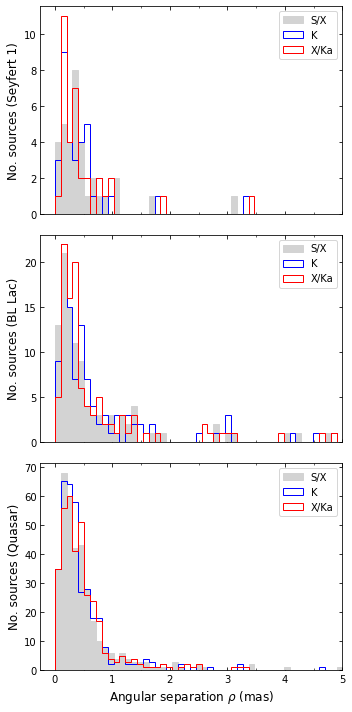

In [9]:
# Histogram of normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(5, 10), nrows=3, sharex=True)

bins_set = np.linspace(0, 5, 50)

# Plot
# Seyfert 1 galaxy
ax0.hist(data[0]["ang_sep_sx_cor"],
         bins_set,
         histtype="step",
         color="lightgrey",
         fill=True,
         label="S/X")
ax0.hist(data[0]["ang_sep_k_cor"],
         bins_set,
         histtype="step",
         color="b",
         label="K")
ax0.hist(data[0]["ang_sep_ka_cor"],
         bins_set,
         histtype="step",
         color="r",
         label="X/Ka")

# BL Lac type
ax1.hist(data[1]["ang_sep_sx_cor"],
         bins_set,
         histtype="step",
         color="lightgrey",
         fill=True,
         label="S/X")
ax1.hist(data[1]["ang_sep_k_cor"],
         bins_set,
         histtype="step",
         fill=False,
         color="b",
         label="K")
ax1.hist(data[1]["ang_sep_ka_cor"],
         bins_set,
         histtype="step",
         fill=False,
         color="r",
         label="X/Ka")

# Quasar
ax2.hist(data[2]["ang_sep_sx_cor"],
         bins_set,
         histtype="step",
         color="lightgrey",
         fill=True,
         label="S/X")
ax2.hist(data[2]["ang_sep_k_cor"],
         bins_set,
         histtype="step",
         fill=False,
         color="b",
         label="K")
ax2.hist(data[2]["ang_sep_ka_cor"],
         bins_set,
         histtype="step",
         fill=False,
         color="r",
         label="X/Ka")

ax0.set_xlim([-0.25, 5])

ax0.set_ylabel("No. sources (Seyfert 1)", fontsize=12)
ax1.set_ylabel("No. sources (BL Lac)", fontsize=12)
ax2.set_ylabel("No. sources (Quasar)", fontsize=12)
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

ax2.set_xlabel("Angular separation $\\rho$ (mas)", fontsize=12)

ax0.legend()
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

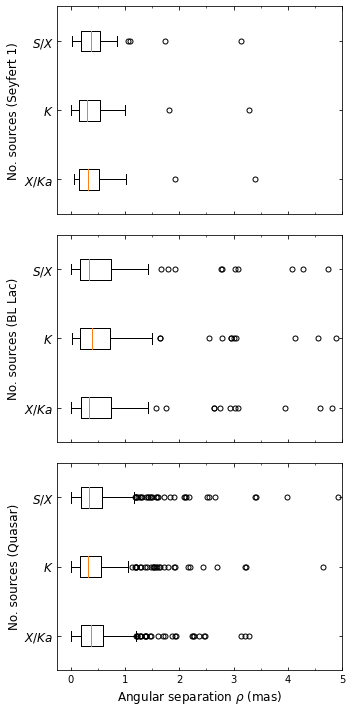

In [10]:
# Histogram of normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(5, 10), nrows=3, sharex=True)

flierprops = dict(marker='o',
                  markerfacecolor="none",
                  markersize=5,
                  lw=0.5,
                  linestyle="none")

# Plot
# Seyfert 1 galaxy
boxdata0 = ax0.boxplot([
    data[0]["ang_sep_ka_cor"], data[0]["ang_sep_k_cor"],
    data[0]["ang_sep_sx_cor"]
],
                       vert=False,
                       flierprops=flierprops)
ax0.set_yticks(np.arange(1, 4))
ax0.set_yticklabels(["$X/Ka$", "$K$", "$S/X$"], fontsize=12)

# BL Lac type
boxdata1 = ax1.boxplot([
    data[1]["ang_sep_ka_cor"], data[1]["ang_sep_k_cor"],
    data[1]["ang_sep_sx_cor"]
],
                       vert=False,
                       flierprops=flierprops)
ax1.set_yticks(np.arange(1, 4))
ax1.set_yticklabels(["$X/Ka$", "$K$", "$S/X$"], fontsize=12)

# Quasar
boxdata2 = ax2.boxplot([
    data[2]["ang_sep_ka_cor"], data[2]["ang_sep_k_cor"],
    data[2]["ang_sep_sx_cor"]
],
                       vert=False,
                       flierprops=flierprops)
ax2.set_yticks(np.arange(1, 4))
ax2.set_yticklabels(["$X/Ka$", "$K$", "$S/X$"], fontsize=12)

ax0.set_xlim([-0.25, 5])

ax0.set_ylabel("No. sources (Seyfert 1)", fontsize=12)
ax1.set_ylabel("No. sources (BL Lac)", fontsize=12)
ax2.set_ylabel("No. sources (Quasar)", fontsize=12)
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

ax2.set_xlabel("Angular separation $\\rho$ (mas)", fontsize=12)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

In [11]:
bands = ["S/X", "K", "X/ka"]
obj_type = ["Seyfert 1", "BL Lac", "Quasar"]
boxdata = [boxdata0, boxdata1, boxdata2]

print("Statistical information extracted from the boxplot")
print("Band  Min     Q1      Q2      Q3      Max     No.outlier")

lw = "{:4s} " + " {:.3f}  " * 5 + "{:3d}"

for j in range(len(obj_type)):
    print(obj_type[j])
    for i in range(len(bands)):
        print(
            lw.format(bands[i], boxdata[j]["whiskers"][2 * i].get_xdata()[1],
                      boxdata[j]["whiskers"][2 * i].get_xdata()[0],
                      boxdata[j]["medians"][i].get_xdata()[0],
                      boxdata[j]["whiskers"][2 * i + 1].get_xdata()[0],
                      boxdata[j]["whiskers"][2 * i + 1].get_xdata()[1],
                      len(boxdata[j]["fliers"][i].get_xdata())))

Statistical information extracted from the boxplot
Band  Min     Q1      Q2      Q3      Max     No.outlier
Seyfert 1
S/X   0.056   0.156   0.313   0.532   1.016    2
K     0.016   0.158   0.311   0.543   1.001    2
X/ka  0.025   0.196   0.376   0.536   0.855    4
BL Lac
S/X   0.010   0.198   0.348   0.738   1.420   11
K     0.029   0.178   0.391   0.732   1.504   11
X/ka  0.009   0.166   0.338   0.750   1.419   10
Quasar
S/X   0.010   0.198   0.382   0.601   1.200   30
K     0.003   0.181   0.317   0.560   1.056   29
X/ka  0.014   0.185   0.332   0.579   1.159   32
